# DBSCAN 적용하기

In [5]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']

iris_df = pd.DataFrame(data=iris.data, columns=feature_names)
iris_df['target'] = iris.target
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


- DBSCAN의 중요 파라미터
    * eps(입실론) : 개별 포인트로부터의 반경 원형거리를 나타냄
    * min_samples : 반경 내에서 존재해야하는 최소 개별 데이터 개수
    * metric : 거리를 어떤 공식으로 측정할지

In [7]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.6, min_samples=8, metric='euclidean')
#DBSCAN도 마찬가지로 fit_predict로 클러스터링 레이블 반환
dbscan_label = dbscan.fit_predict(iris.data)
iris_df['dbscan_label'] = dbscan_label

#원본 데이터의 class와 클러스터링 레이블 비교하면서 어떻게 클러스터링 됬는지 확인
iris_df.groupby(['target'])['dbscan_label'].value_counts()

target  dbscan_label
0        0              49
        -1               1
1        1              46
        -1               4
2        1              42
        -1               8
Name: dbscan_label, dtype: int64

In [8]:
# 클러스터링 결과담은 것 시각화하는 함수
def visualize_cluster_plot(clusterobj, df, label_name, iscenter=True):
    if iscenter:
        centers = clusterobj.cluster_centers_
    
    unique_labels = np.unique(df[label_name].values)
    markers = ['o','s','^','x','*']
    # DBSCAN아닐 경우
    isNoise=False
    
    for label in unique_labels:
        label_cluster = df[df[label_name]==label]
        # DBSCAN에서 반환하는 Noise는 -1을 label로 가짐
        if label == -1:
            cluster_legend = 'Noise'
            isNoise = True
        else:
            cluster_legend = 'Cluster'+str(label)
        # 모든 개별 데이터 분포 나타내기
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'],
                   s=70, edgecolor='k', marker=markers[label],
                   label=cluster_legend)
        # 클러스터링 중심 좌표 반환하는 모델이면 if문으로 다시 들어가!
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250,
                       color='white', alpha=0.9, edgecolor='k',
                       marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70,
                       color='k', edgecolor='k',
                       marker='$%d$' % label)
    # DBSCAN의 Noise일 때
    if isNoise:
        legend_loc = 'upper center'
    else:
        legend_loc = 'upper right'
    plt.legend(loc=legend_loc)
    plt.show()

In [9]:
# PCA로 2차원 feature로 만든 후 DBSCAN 적용 후 클러스터링 시각화
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=12)
pca_transformed = pca.fit_transform(iris.data)
iris_df['ftr1'] = pca_transformed[:,0]
iris_df['ftr2'] = pca_transformed[:,1]

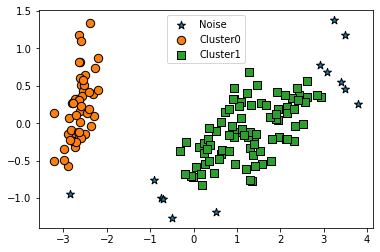

In [12]:
visualize_cluster_plot(dbscan, iris_df, 'dbscan_label', iscenter=False)

- eps 파라미터값
    * 높은 값일수록 Noise가 적어짐
    * 적은 값일수록 Noise가 많아짐



- min_samples 파라미터값
    * 높은 값일수록 Noise가 많아짐
    * 적은 값일수록 Noise가 적어짐

target  dbscan_label
0        0              50
1        1              50
2        1              47
        -1               3
Name: dbscan_label, dtype: int64


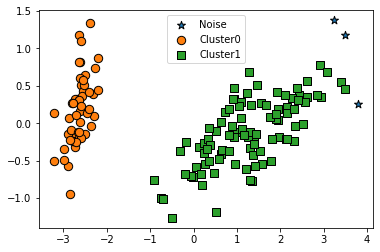

In [13]:
# eps값을 기존보다 높였을 때 노이즈 확인
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.8, min_samples=8, metric='euclidean')
dbscan_label = dbscan.fit_predict(iris.data)

iris_df['dbscan_label'] = dbscan_label
iris_df['target'] = iris.target

iris_result = iris_df.groupby('target')['dbscan_label'].value_counts()
print(iris_result)

visualize_cluster_plot(dbscan, iris_df, 'dbscan_label', iscenter=False)


target  dbscan_label
0        0              48
        -1               2
1        1              44
        -1               6
2        1              36
        -1              14
Name: dbscan_label, dtype: int64


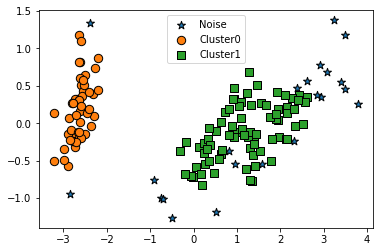

In [15]:
#min_samples 값을 기존보다 높였을 때 노이즈 확인
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.6, min_samples=15, metric='euclidean')
dbscan_label = dbscan.fit_predict(iris.data)

iris_df['dbscan_label'] = dbscan_label
iris_df['target'] = iris.target

iris_result = iris_df.groupby('target')['dbscan_label'].value_counts()
print(iris_result)

visualize_cluster_plot(dbscan, iris_df, 'dbscan_label', iscenter=False)



When value of 'factor' argu is 0.9


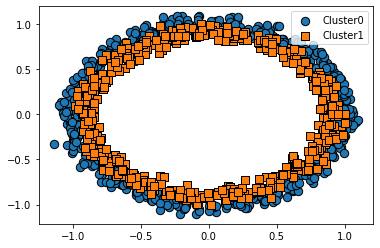

When value of 'factor' argu is 0.5


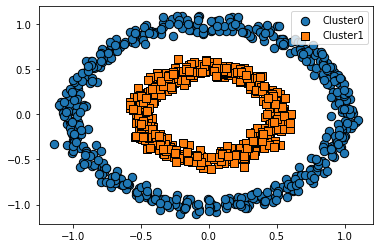

When value of 'factor' argu is 0.2


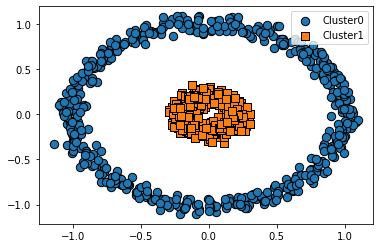

In [26]:
# DBSCAN에 맞는 데이터셋 생성 make_circles함수
from sklearn.datasets import make_circles
factors = [0.9, 0.5, 0.2]
for factor in factors:
    print(f"When value of 'factor' argu is {factor}")
    X, y = make_circles(n_samples=1000, shuffle=True, noise=0.05,
                       random_state=12, factor=factor)
    cluster_df = pd.DataFrame(data=X, columns=['ftr1','ftr2'])
    cluster_df['target'] = y

    visualize_cluster_plot(None, cluster_df, 'target', iscenter=False)

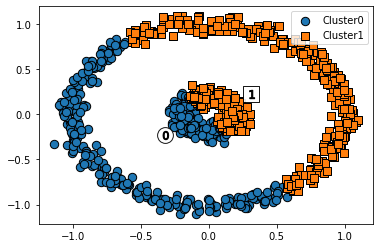

In [27]:
# make_circles 데이터를 K-means에 적용해보기
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, max_iter=1000, random_state=42)
kmeans_label = kmeans.fit_predict(X)
cluster_df['kmeans_label'] = kmeans_label

visualize_cluster_plot(kmeans, cluster_df, 'kmeans_label', iscenter=True)

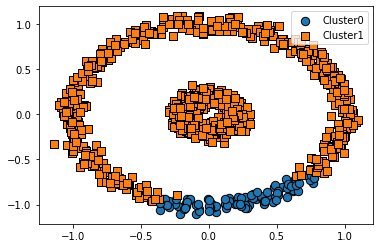

In [28]:
# GMM도 사용해보기
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=2, random_state=13)
gmm_label = gmm.fit_predict(X)
cluster_df['gmm_label'] = gmm_label

visualize_cluster_plot(gmm, cluster_df, 'gmm_label', iscenter=False)

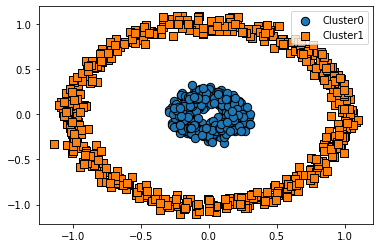

In [29]:
# DBSCAN에 적용하기
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=8, metric='euclidean')
dbscan_label = dbscan.fit_predict(X)
cluster_df['dbscan_label'] = dbscan_label

visualize_cluster_plot(dbscan, cluster_df, 'dbscan_label', iscenter=False)